In [228]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import scipy.stats as sps
from sklearn.metrics import precision_score, recall_score
sns.set()

df = pd.read_csv('puid_bayan_with_features.csv')
df['is_bayan'] = np.logical_or(df.artist_bayan > 2, df.track_bayan > 2)
print(f'Num bayans: {np.sum(df.is_bayan)}, share bayans: {np.sum(df.is_bayan)/len(df.is_bayan)}')
df['artist_and_track_180d'] = df.artist_plays_180d + df.track_plays_180d
df['artist_and_track_30d'] = df.artist_plays_30d + df.track_plays_30d
df['artist_and_track_skips_180d'] = df.artist_skips_180d + df.track_skips_180d
df['artist_and_track_skips_30d'] = df.artist_skips_30d + df.track_skips_30d
target_bayan_artist = df.artist_bayan > 1
target_bayan_track = df.track_bayan > 1
X = df.drop(['puid', 'title', 'artist_name', 'id', 'track_id', 'timestamp', 'artist_bayan', 'track_bayan', 'is_bayan'], axis=1)

Num bayans: 54, share bayans: 0.3624161073825503


In [229]:
list(X)

['album_plays_180d',
 'album_plays_30d',
 'album_plays_rec_180d',
 'artist_plays_180d',
 'artist_plays_30d',
 'artist_plays_rec_180d',
 'artist_skips_180d',
 'artist_skips_30d',
 'track_long_history_plays_30d',
 'track_plays_180d',
 'track_plays_30d',
 'track_plays_rec_180d',
 'track_skips_180d',
 'track_skips_30d',
 'artist_and_track_180d',
 'artist_and_track_30d',
 'artist_and_track_skips_180d',
 'artist_and_track_skips_30d']

In [234]:
useful_features = list(X)

def precision_recall_data_with_thr(df):
    for_plotly = {'precision': [], 'recall': [], 'feature': [], 'thr': []}
    for feature in useful_features:
        for thr in np.linspace(np.min(df[feature]), min(100, np.max(df[feature])), 200):
            predictions = df[feature] >= thr
            precision_score_calc = precision_score(df.is_bayan, predictions)
            recall_score_calc = recall_score(df.is_bayan, predictions)
            if 0.5 < precision_score_calc < 1 and  0.2 < recall_score_calc < 1:
                for_plotly['precision'].append(precision_score_calc)
                for_plotly['recall'].append(recall_score_calc)
                for_plotly['feature'].append(feature)
                for_plotly['thr'].append(thr)
    df_for_plotly = pd.DataFrame(for_plotly)
    return df_for_plotly


In [235]:
df_for_plotly = precision_recall_data_with_thr(df)
px.scatter(df_for_plotly, x='recall', y='precision', color='feature', hover_name='thr')


ValueError: num must be 1 <= num <= 15, not 16

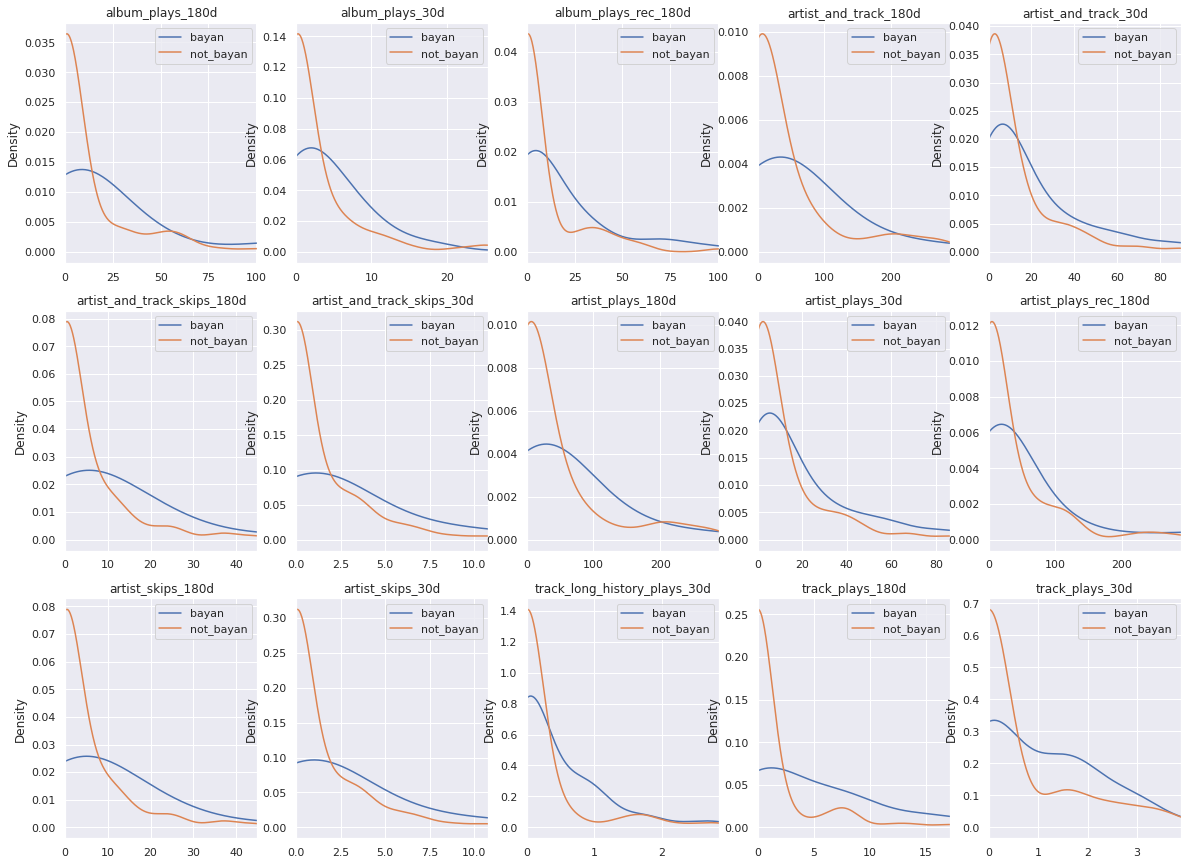

In [237]:
plt.figure(figsize=(20,15))
# is_bayan = np.logical_or(target_bayan_artist, target_bayan_track)
index = 1
for feature in sorted(list(X)):
    is_bayan = df.is_bayan
    bayan_data = df[feature][is_bayan]
    non_bayan_data = df[feature][np.logical_not(is_bayan)]
    plt.subplot(3, 5, index)
    try:
        pd.Series(bayan_data).plot.kde(label='bayan')
        pd.Series(non_bayan_data).plot.kde(label='not_bayan')
        plt.xlim(0, min(np.max(non_bayan_data), np.max(bayan_data)))
        plt.legend()
    except Exception as e:
        print(e)
        pass
    plt.title(feature)
    index += 1
plt.show()

In [74]:
feature = 'artist_plays_30d'

bayan_data = df[feature][np.logical_or(target_bayan_artist, target_bayan_track)]
non_bayan_data = df[feature][np.logical_not(np.logical_or(target_bayan_artist, target_bayan_track))]
fig = ff.create_distplot([bayan_data, non_bayan_data], ['bayan', 'non_bayan'], bin_size=1, show_hist=False,
                         show_rug=False)
fig.show()


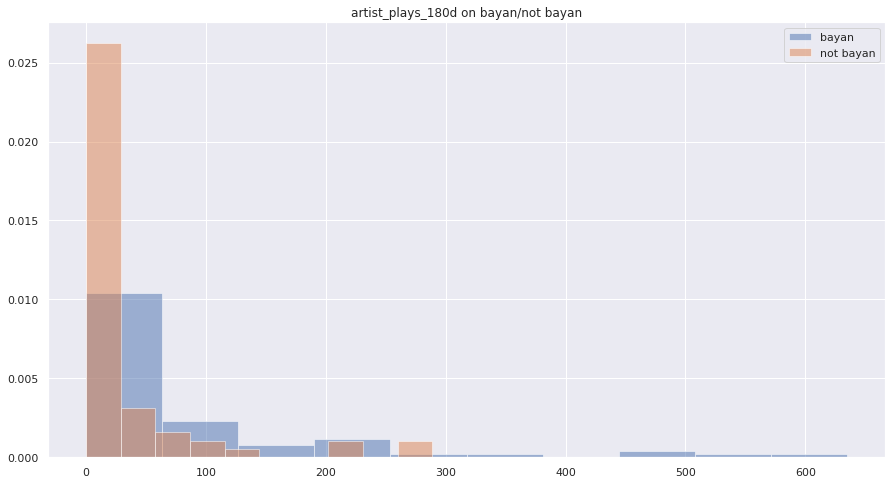

In [42]:
plt.figure(figsize=(15,8))
plt.hist(df[feature][np.logical_or(target_bayan_artist, target_bayan_track)], label='bayan', density=True, alpha=0.5)
plt.hist(df[feature][np.logical_not(np.logical_or(target_bayan_artist, target_bayan_track))], label='not bayan', density=True, alpha=0.5)
plt.title(f'{feature} on bayan/not bayan')
plt.legend()
plt.show()

[Text(470.8125, 391.392, 'X[9] <= 2.902\ngini = 0.486\nsamples = 149\nvalue = [87, 62]'),
 Text(261.5625, 304.416, 'X[4] <= 50.79\ngini = 0.356\nsamples = 108\nvalue = [83, 25]'),
 Text(209.25, 217.44, 'X[4] <= 3.008\ngini = 0.322\nsamples = 104\nvalue = [83, 21]'),
 Text(104.625, 130.464, 'X[3] <= 3.596\ngini = 0.436\nsamples = 53\nvalue = [36, 17]'),
 Text(52.3125, 43.488, 'gini = 0.403\nsamples = 50\nvalue = [36, 14]'),
 Text(156.9375, 43.488, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(313.875, 130.464, 'X[1] <= 7.071\ngini = 0.145\nsamples = 51\nvalue = [47, 4]'),
 Text(261.5625, 43.488, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(366.1875, 43.488, 'gini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(313.875, 217.44, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(680.0625, 304.416, 'X[8] <= 2.87\ngini = 0.176\nsamples = 41\nvalue = [4, 37]'),
 Text(627.75, 217.44, 'X[10] <= 3.289\ngini = 0.139\nsamples = 40\nvalue = [3, 37]'),
 Text(523.125, 130.464, 'X[7] <= 4.71

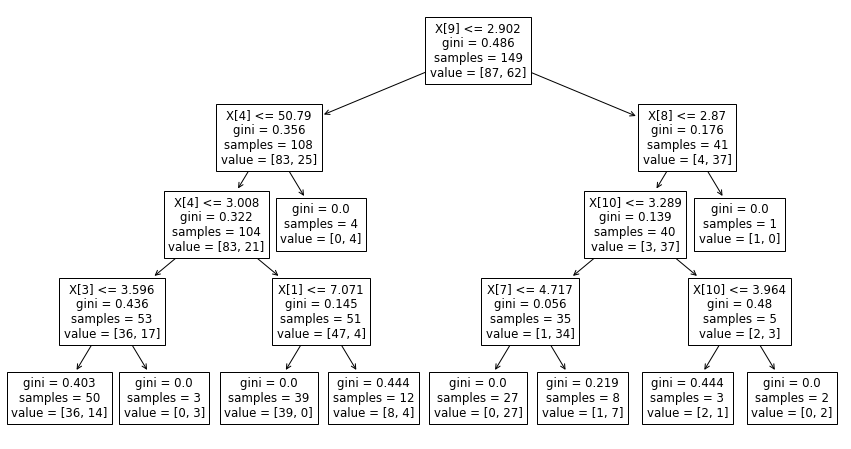

In [27]:
clf = DecisionTreeClassifier(max_depth=4).fit(df, target_bayan_track)
plt.figure(figsize=(15, 8))
plot_tree(clf)